In [69]:
import pickle
import matplotlib.dates as mdates
from obspy import Stream, Trace, UTCDateTime

from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import FastICA,PCA

plt.rcParams["date.converter"] = "concise"
%config InlineBackend.figure_format = "svg"

# Load data from file
with np.load("scattering_coefficients11h43.npz", allow_pickle=True) as data:
    order_1 = data["order_1"]
    order_2 = data["order_2"]
    times = data["times"]

# Reshape and stack scattering coefficients of all orders
order_1 = order_1.reshape(order_1.shape[0], -1)
order_2 = order_2.reshape(order_2.shape[0], -1)
scattering_coefficients = np.hstack((order_1, order_2))

# transform into log
scattering_coefficients = np.log(scattering_coefficients)

# print info about shape
n_times, n_coeff = scattering_coefficients.shape
print_info = "Collected {} samples of {} dimensions each.".format(n_times, n_coeff)
print("Collected {} samples of {} dimensions each.".format(n_times, n_coeff))

Collected 450 samples of 728 dimensions each.


In [70]:
import pandas as pd

new_file_path = 'bubble_summary.csv'
new_data = pd.read_csv(new_file_path)


new_data = new_data['Month,Date,Hour,Minute,Second,Milisec,Sampling_rate,Subsection'].str.split(',', expand=True)
new_data.columns = ['Month', 'Date', 'Hour', 'Minute', 'Second', 'Milisec', 'Sampling_rate', 'Subsection']

new_data[['Month', 'Date', 'Hour', 'Minute', 'Second']] = new_data[['Month', 'Date', 'Hour', 'Minute', 'Second']].apply(pd.to_numeric)

# Perform a test filter for July 1, 2021, from 11:43:49 to 11:43:53 to ensure correctness
test_data = new_data[
    (new_data['Date'] == 1) & 
    (new_data['Month'] == 7) & 
    (new_data['Hour'] == 11) & 
    (new_data['Minute'] == 43) & 
    (new_data['Second'] >= 49) & 
    (new_data['Second'] <= 53)
]




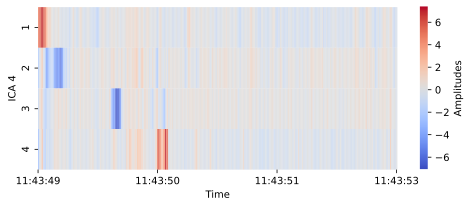

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.decomposition import FastICA
import numpy as np


times_num = mdates.date2num(times)  

# Application de l'ICA avec 4 composants
model_ica = FastICA(n_components=4, random_state=42)
ica_features = model_ica.fit_transform(scattering_coefficients)

# Trouver l'indice de la valeur maximale absolue pour chaque caractéristique
max_abs_indices = np.argmax(np.abs(ica_features), axis=0)
# Trier les indices par ces valeurs maximales absolues pour ordonner les composants
sorted_indices = np.argsort(max_abs_indices)
# Trier les caractéristiques
sorted_ica_features = ica_features[:, sorted_indices]

fig, ax = plt.subplots(figsize=(7, 3))

# Utiliser seaborn pour créer la heatmap des composants ICA triés
sns.heatmap(sorted_ica_features.T, ax=ax, cmap="coolwarm", cbar_kws={'label': 'Amplitudes'},
            xticklabels=False)

ax.set_xlabel("Time")
ax.set_ylabel("ICA 4")
ax.set_yticks(np.arange(0.5, 4.5))
ax.set_yticklabels(range(1, 5))
# Formater l'axe des x pour afficher les dates
xtick_locs = np.linspace(0, len(times_num) - 1, num=4)  # Définir 4 positions pour les labels sur l'axe des x
xtick_labels = [mdates.num2date(times_num[int(loc)]).strftime('%H:%M:%S') for loc in xtick_locs]
ax.set_xticks(xtick_locs)
ax.set_xticklabels(xtick_labels)  

plt.tight_layout()
plt.show()

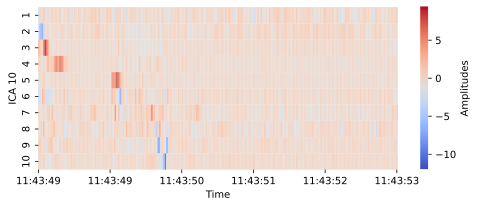

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.decomposition import FastICA
import numpy as np


times_num = mdates.date2num(times)  

model_ica = FastICA(n_components=10, random_state=42)
ica_features = model_ica.fit_transform(scattering_coefficients)
max_abs_indices = np.argmax(np.abs(ica_features), axis=0)
sorted_indices = np.argsort(max_abs_indices)
sorted_ica_feature = ica_features[:, sorted_indices]

fig, ax = plt.subplots(figsize=(7, 3))

# Utiliser seaborn pour créer la heatmap des composants ICA triés
sns.heatmap(sorted_ica_feature.T, ax=ax, cmap="coolwarm", cbar_kws={'label': 'Amplitudes'},
            xticklabels=False)


ax.set_xlabel("Time")
ax.set_ylabel("ICA 10")
ax.set_yticks(np.arange(0.5, 10.5))
ax.set_yticklabels(range(1, 11))
xtick_locs = np.linspace(0, len(times_num) - 1, num=6)  # Définir 4 positions pour les labels sur l'axe des x
xtick_labels = [mdates.num2date(times_num[int(loc)]).strftime('%H:%M:%S') for loc in xtick_locs]
ax.set_xticks(xtick_locs)
ax.set_xticklabels(xtick_labels)  

plt.tight_layout()
plt.show()

# similarité entre M4 et M10 sur le feature 4 

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.decomposition import FastICA
import numpy as np


times_num = mdates.date2num(times)  

model_ica = FastICA(n_components=50, random_state=42)
ica_features = model_ica.fit_transform(scattering_coefficients)
max_abs_indices = np.argmax(np.abs(ica_features), axis=0)
sorted_indices = np.argsort(max_abs_indices)
sorted_ica_features = ica_features[:, sorted_indices]

fig, ax = plt.subplots(figsize=(7, 3))

# Utiliser seaborn pour créer la heatmap des composants ICA triés
sns.heatmap(sorted_ica_features.T, ax=ax, cmap="coolwarm", cbar_kws={'label': 'Amplitudes'},
            xticklabels=False)


ax.set_xlabel("Time")
ax.set_ylabel("ICA 50")
ax.set_yticks(np.arange(9.5, 50, 10))
# Définir les étiquettes des ticks pour 10, 20, 30, 40, et 50
ax.set_yticklabels(np.arange(10, 51, 10))
xtick_locs = np.linspace(0, len(times_num) - 1, num=6)  # Définir 4 positions pour les labels sur l'axe des x
xtick_labels = [mdates.num2date(times_num[int(loc)]).strftime('%H:%M:%S') for loc in xtick_locs]
ax.set_xticks(xtick_locs)
ax.set_xticklabels(xtick_labels)  

plt.tight_layout()
plt.show()

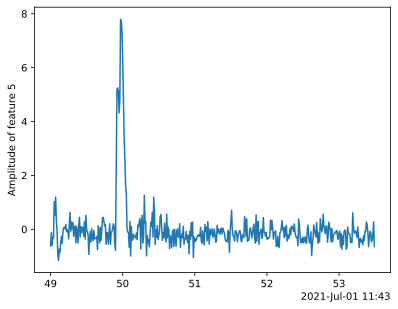

In [74]:

feature_id = 4 #

fig, ax = plt.subplots()
ax.plot(times, sorted_ica_feature[:, feature_id])
ax.set_ylabel(f"Amplitude of feature {feature_id +1 }")  # +1 pour afficher un numéro de fonction basé sur 1

plt.show()


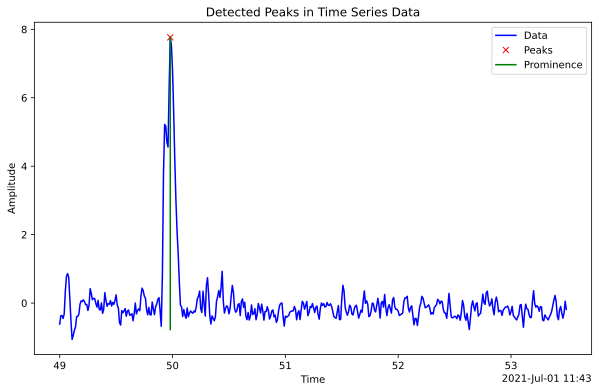

In [75]:
from scipy.ndimage import uniform_filter1d
from scipy.signal import find_peaks
# Apply a smoothing filter using a window size of 5 for the moving average
smoothed_features = uniform_filter1d(sorted_ica_feature[:, 4], size=2)


def detect_and_plot_peaks(data, times, prominence=0.1, width=None, distance=None):
    """
    Detect peaks in a given time series data and plot the results with peaks marked, including prominences.
    
    Parameters:
        data (np.array): The time series data.
        times (np.array): The timestamps for the data points.
        prominence (float): The required prominence to qualify as a peak.
        width (float): The minimum width of the peaks.
        distance (float): The minimum distance between peaks.
        
    Returns:
        list: Times of the detected peaks.
        matplotlib.figure.Figure: The plot of the data with peaks and their prominences marked.
    """
    from scipy.signal import find_peaks
    import matplotlib.pyplot as plt
    
    # Detect peaks
    peaks, properties = find_peaks(data, prominence=prominence, width=width, distance=distance)
    
    # Extract the peak times
    peak_times = times[peaks]
    peak_times_str = [t.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3] for t in peak_times]
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(times, data, label='Data', color='blue')
    ax.plot(peak_times, data[peaks], "x", label='Peaks', color='r')
    
    # Marking the prominence on the graph
    prominences = properties['prominences']
    for i, peak in enumerate(peaks):
        ax.plot([times[peak], times[peak]], [data[peak] - prominences[i], data[peak]], color='green', label='Prominence' if i == 0 else "")
    
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')
    ax.set_title('Detected Peaks in Time Series Data')
    ax.legend()
    
    # Return the peak times and the plot figure
    return peak_times_str, fig


# Utilisez votre propre tableau de données et de temps ici
peak_times_str_dynamic, fig = detect_and_plot_peaks(smoothed_features, times, prominence=2)
plt.show()


In [76]:
peak_times_str_dynamic

['2021-07-01 11:43:49.980']

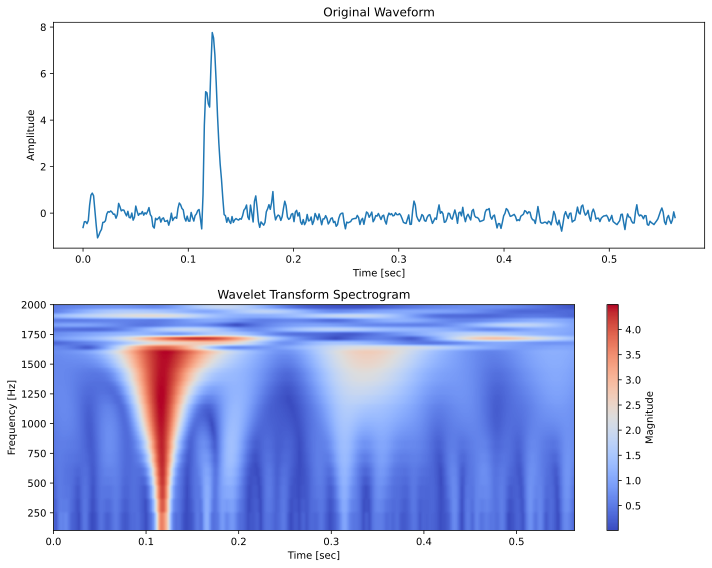

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cwt, morlet

fs = 8000  # Fréquence d'échantillonnage
fc = 1

num_scales = 50  # Nombre de points d'échelle
s_min = fs * fc / 2000
s_max = fs * fc / 100
widths = np.logspace(np.log10(s_min), np.log10(s_max), num_scales).astype(int) 

frequencies = fs * fc / widths


Zxx = cwt(smoothed_features, morlet, widths)

# Création du temps correspondant aux données
times = np.linspace(0, 10*len(smoothed_features) / fs, num=len(smoothed_features))

# Affichage
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(times, smoothed_features)
axs[0].set_title('Original Waveform')
axs[0].set_xlabel('Time [sec]')
axs[0].set_ylabel('Amplitude')   

pcm = axs[1].imshow(np.abs(Zxx), extent=[times.min(), times.max(), frequencies.min(), frequencies.max()], cmap='coolwarm', aspect='auto', origin='lower')
axs[1].set_title('Wavelet Transform Spectrogram')
axs[1].set_xlabel('Time [sec]')
axs[1].set_ylabel('Frequency [Hz]')
fig.colorbar(pcm, ax=axs[1], label='Magnitude')
plt.tight_layout()
plt.show()
